In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Better visualization of plots
import mplcyberpunk
plt.style.use("cyberpunk")



#### Importing and Initial Analysis

In [54]:
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [55]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [56]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [58]:
df['Level']

0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object

#### Cleaning our data

In [59]:
df.drop_duplicates()
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [60]:
print('Cancer Levels: ', df['Level'].unique())
map = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(map, inplace=True)
print('Cancer Levels: ', df['Level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [61]:
df = df.drop('Patient Id', axis=1)
df = df.drop('index', axis=1)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


#### Data Visualization

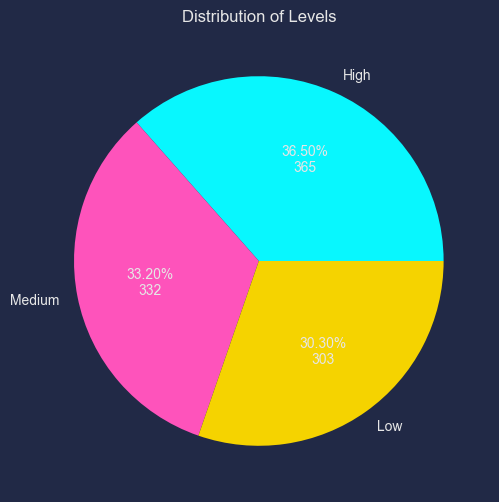

In [62]:
plt.figure(figsize=(10,6))
plt.pie(df['Level'].value_counts(), 
        labels=map.keys(), 
        autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df['Level'].value_counts()) / 100))
plt.title('Distribution of Levels')
plt.show()

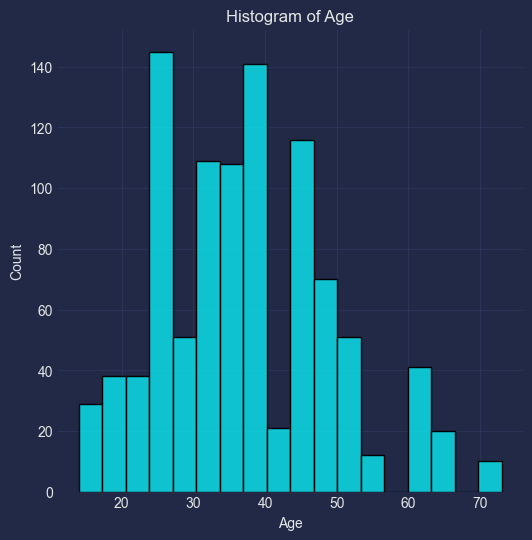

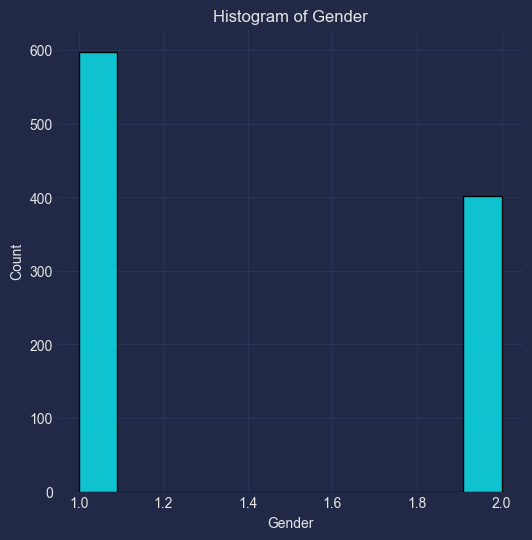

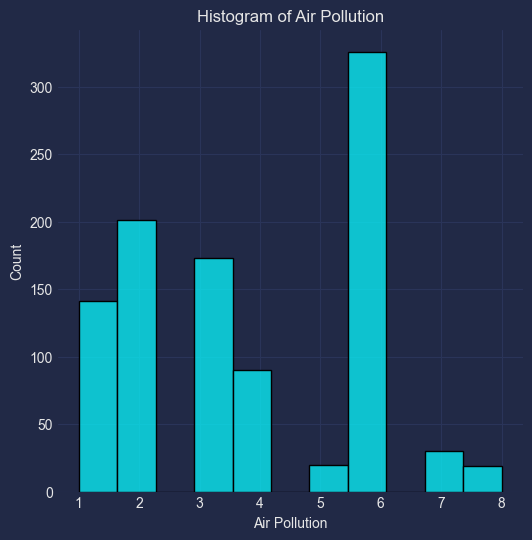

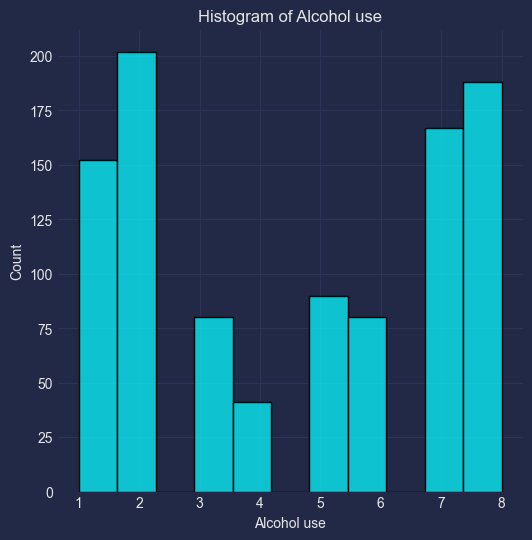

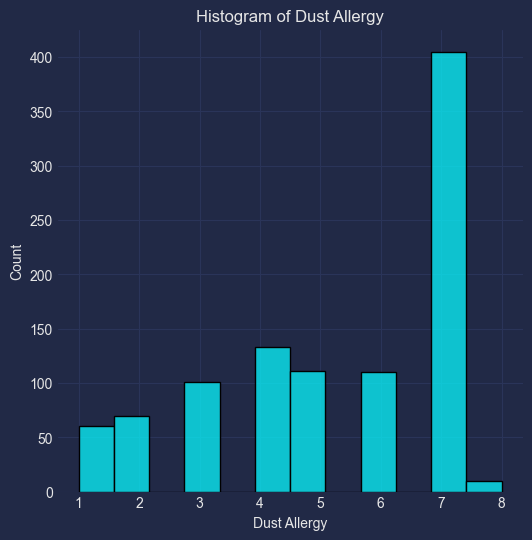

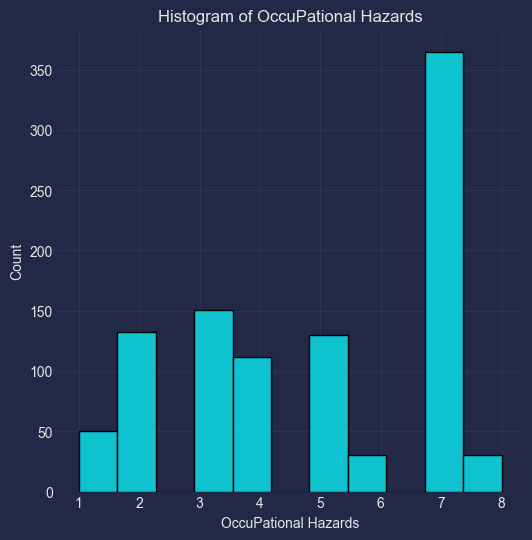

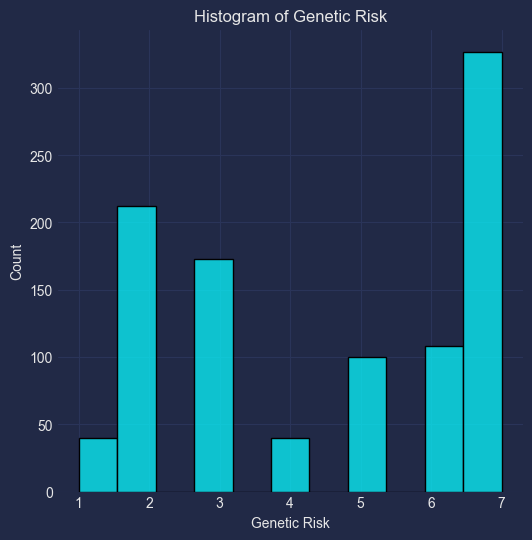

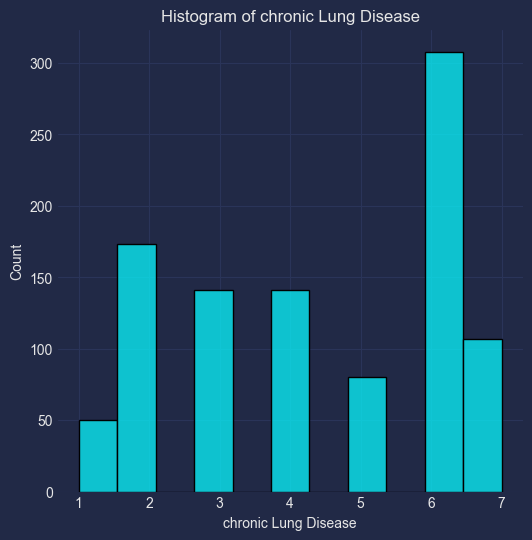

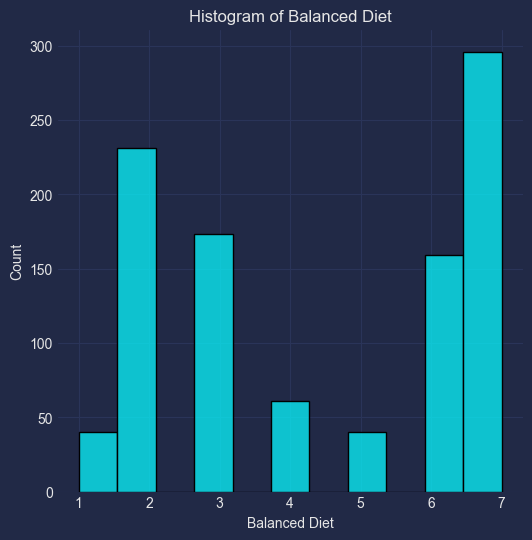

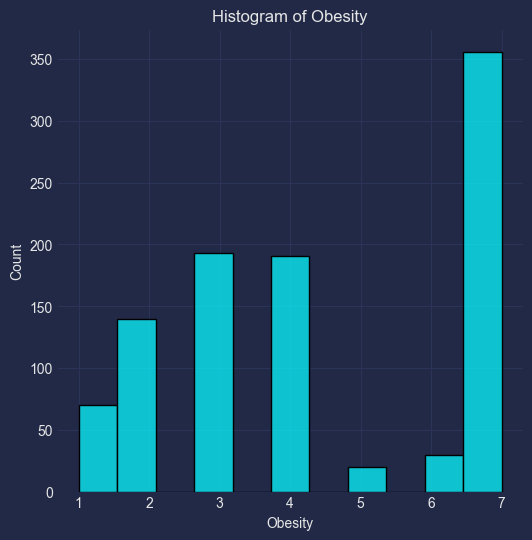

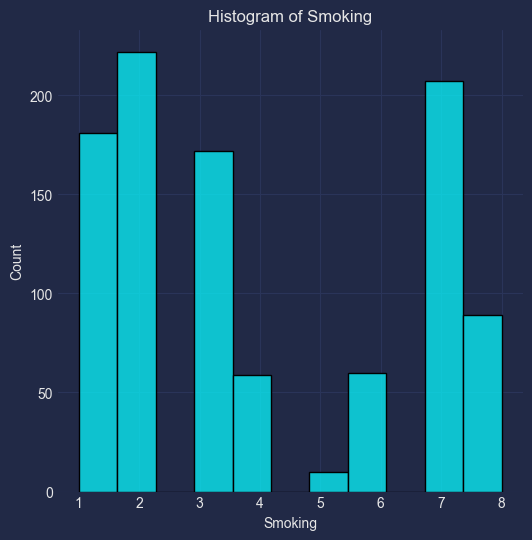

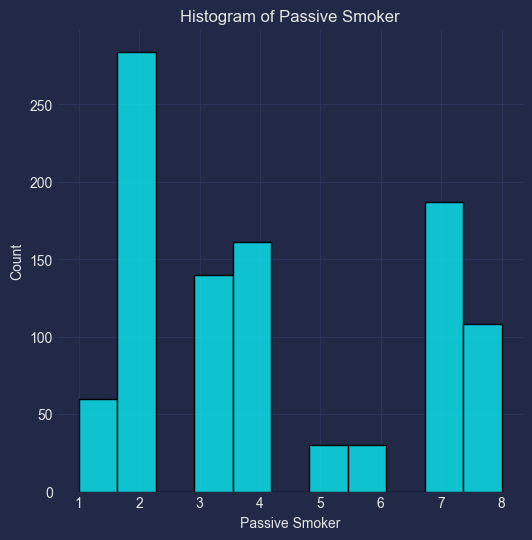

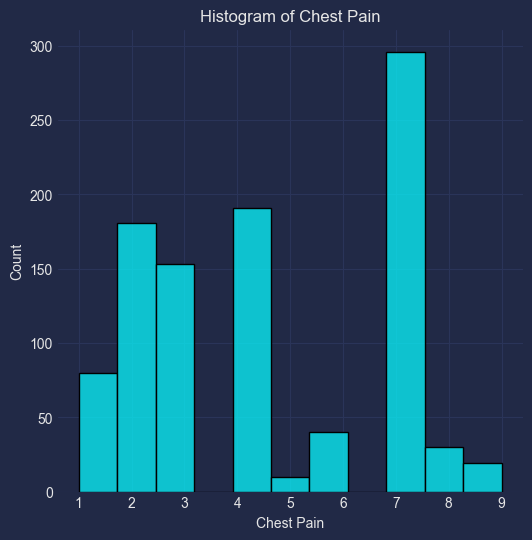

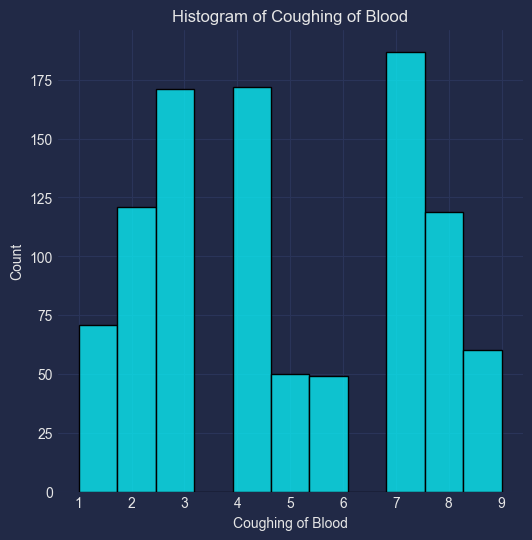

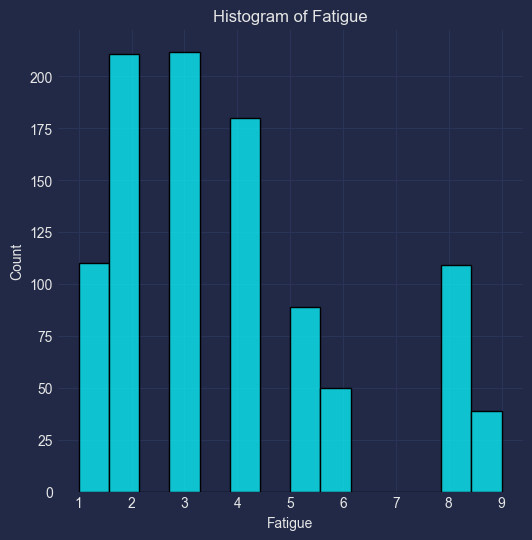

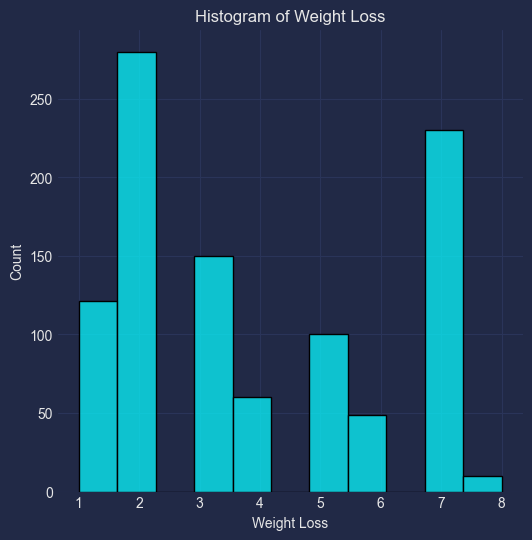

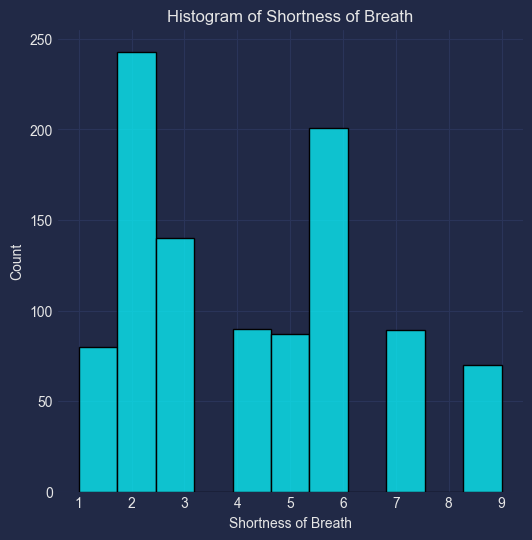

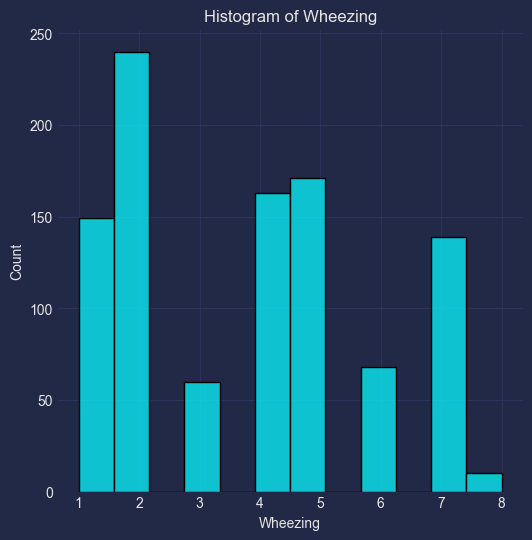

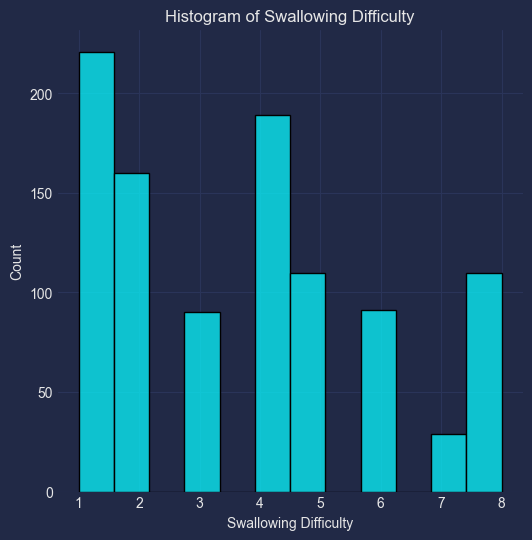

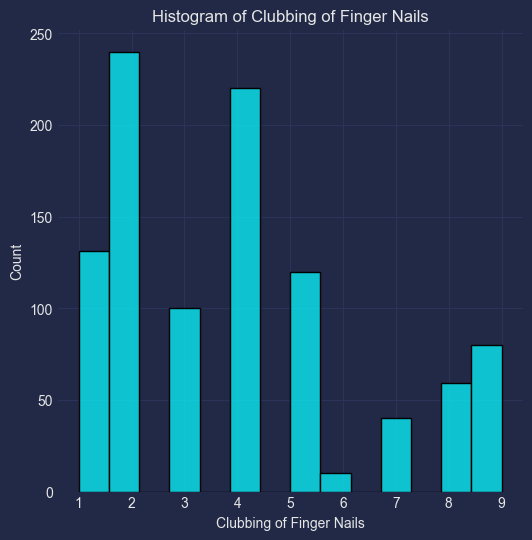

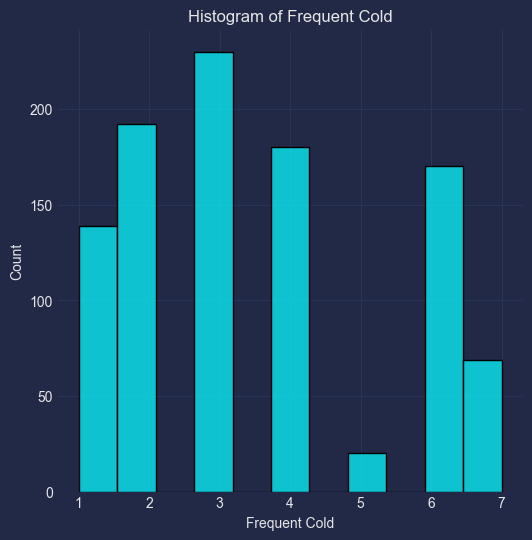

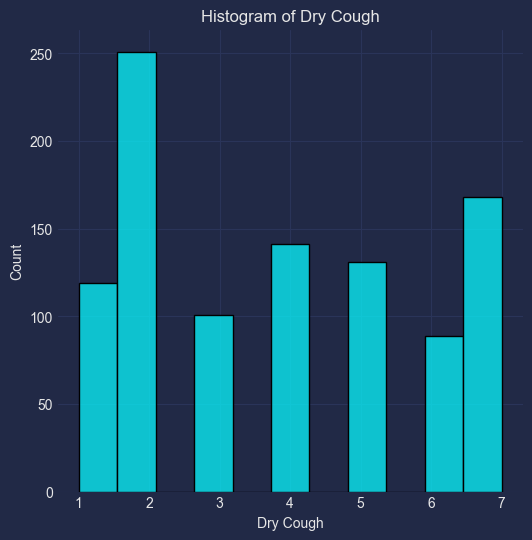

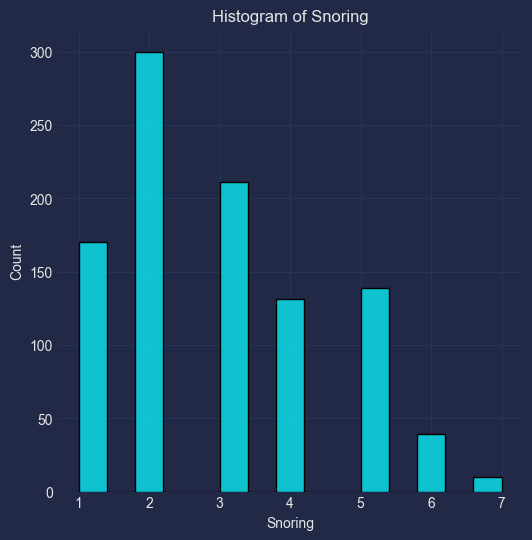

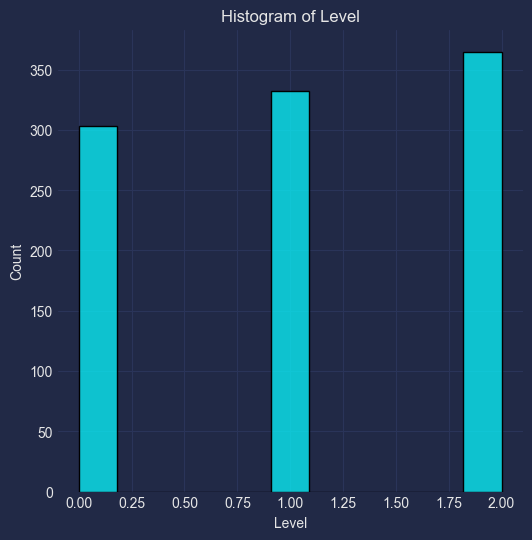

In [63]:
for column in df.columns:
    plt.figure(figsize=(6,6))
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.show()

#### Spliting into y and x 

In [64]:
y = df.pop('Level')
x = df
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , shuffle= True , random_state=40)
print(f'Shapes - X Training: {x_train.shape} and X Testing {x_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)


## KNN (k-nearest neighbors) 

#### Checking the best PCA for KNN (feature count)

In [65]:
for i in range(2,23):
    pca = PCA(n_components=i)
    pca.fit(x_train)
    print(f"Redukcja z 23 do {i} dokladnoscL: {sum(pca.explained_variance_ratio_ * 100.0):.1f}%.")
    print("Znaczenie kolejnych cech \n " + "\n".join(str(i) for i in pca.explained_variance_ratio_))
    

Redukcja z 23 do 2 dokladnoscL: 76.9%.
Znaczenie kolejnych cech 
 0.5862088437536314
0.18272830031370893
Redukcja z 23 do 3 dokladnoscL: 82.7%.
Znaczenie kolejnych cech 
 0.5862088437536321
0.18272830031370077
0.057606016816021476
Redukcja z 23 do 4 dokladnoscL: 86.3%.
Znaczenie kolejnych cech 
 0.5862088437536314
0.18272830031370924
0.057606016983877704
0.03688737743385457
Redukcja z 23 do 5 dokladnoscL: 89.2%.
Znaczenie kolejnych cech 
 0.5862088437536307
0.18272830031370924
0.057606016988330365
0.03688737750008884
0.02861620311431528
Redukcja z 23 do 6 dokladnoscL: 91.5%.
Znaczenie kolejnych cech 
 0.5862088437536304
0.18272830031370946
0.05760601698760869
0.03688737750816075
0.028616203069880053
0.0224863132747491
Redukcja z 23 do 7 dokladnoscL: 92.7%.
Znaczenie kolejnych cech 
 0.5862088437536314
0.1827283003137091
0.05760601698833554
0.03688737752508251
0.028616203120941673
0.02248631328245863
0.012911772333619008
Redukcja z 23 do 8 dokladnoscL: 93.9%.
Znaczenie kolejnych cech 
 

##### checking the best number of neighbors

In [66]:
train_accuracy = []
test_accuracy = []

for n in range(2, 11):
    knn_lib = KNeighborsClassifier(n_neighbors=n)
    knn_lib.fit(x_train, y_train)
    train_accuracy.append(knn_lib.score(x_train,y_train))
    test_accuracy.append(knn_lib.score(x_test,y_test))

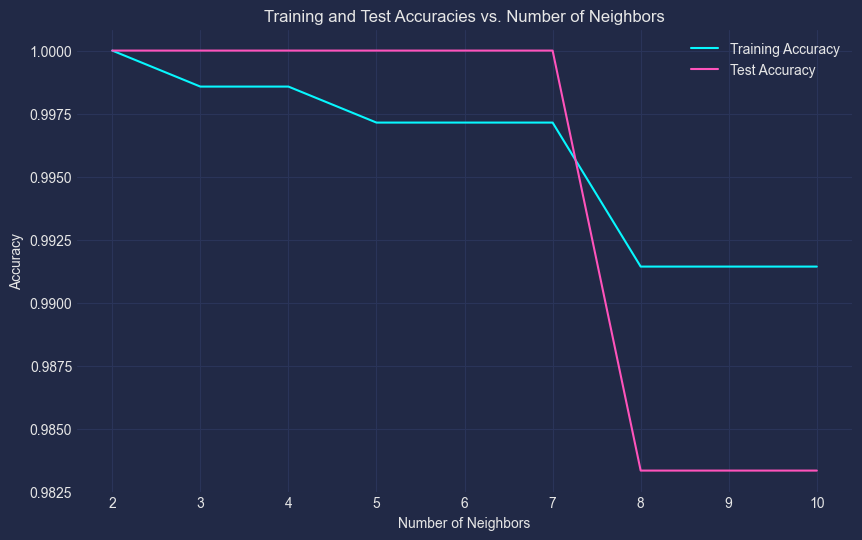

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracy, label="Training Accuracy")
plt.plot(range(2, 11), test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.title("Training and Test Accuracies vs. Number of Neighbors")
plt.legend()
plt.show()

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

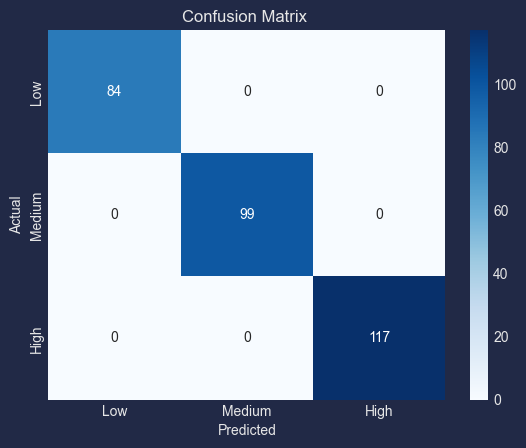

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [69]:
ml_accuracies = {}

def confusion_m(name):
    cm = confusion_matrix(y_test, name)
    sns.heatmap(cm, annot=True, fmt='d',
                cmap='Blues',      
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'])
    plt.title('Confusion Matrix ')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# View the classification report
    report = classification_report(y_test, name)
    print(f"Classification Report:")
    print(report)
    
confusion_m(knn_pred)
ml_accuracies['KNN'] = accuracy_score(y_test, knn_pred)

## Naive Bayes

In [70]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
gnb_pred = gnb_model.predict(x_test)


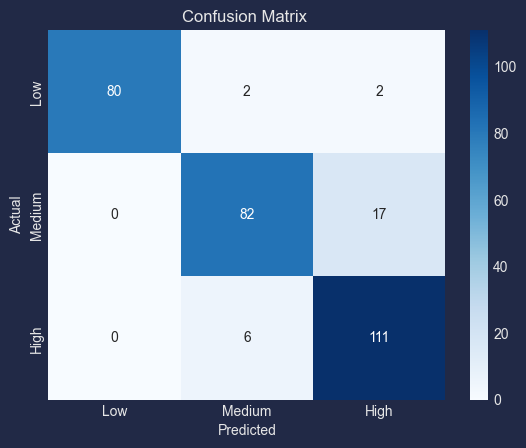

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [71]:
confusion_m(gnb_pred)
ml_accuracies['GNB'] = accuracy_score(y_test, gnb_pred)

## Ramdom Forest

In [72]:
rf = RandomForestClassifier(max_depth=20, random_state=200)
rf_model = rf.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

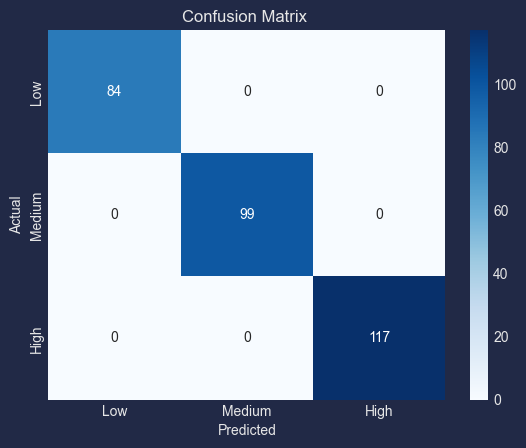

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [73]:
confusion_m(rf_pred)
ml_accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)

## Decision Tree

In [74]:
dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(x_train, y_train)
dec_tree_pred = dec_tree.predict(x_test)

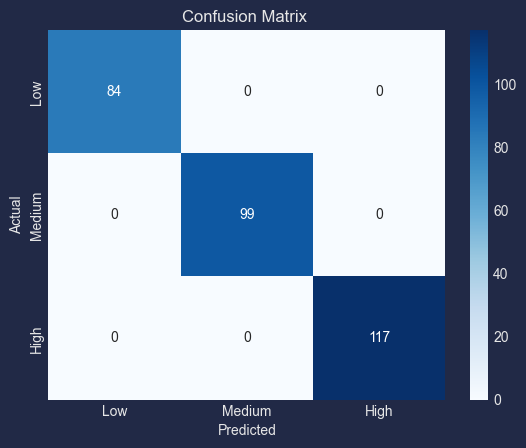

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [75]:
confusion_m(rf_pred)
ml_accuracies['Decision Tree'] = accuracy_score(y_test, dec_tree_pred)

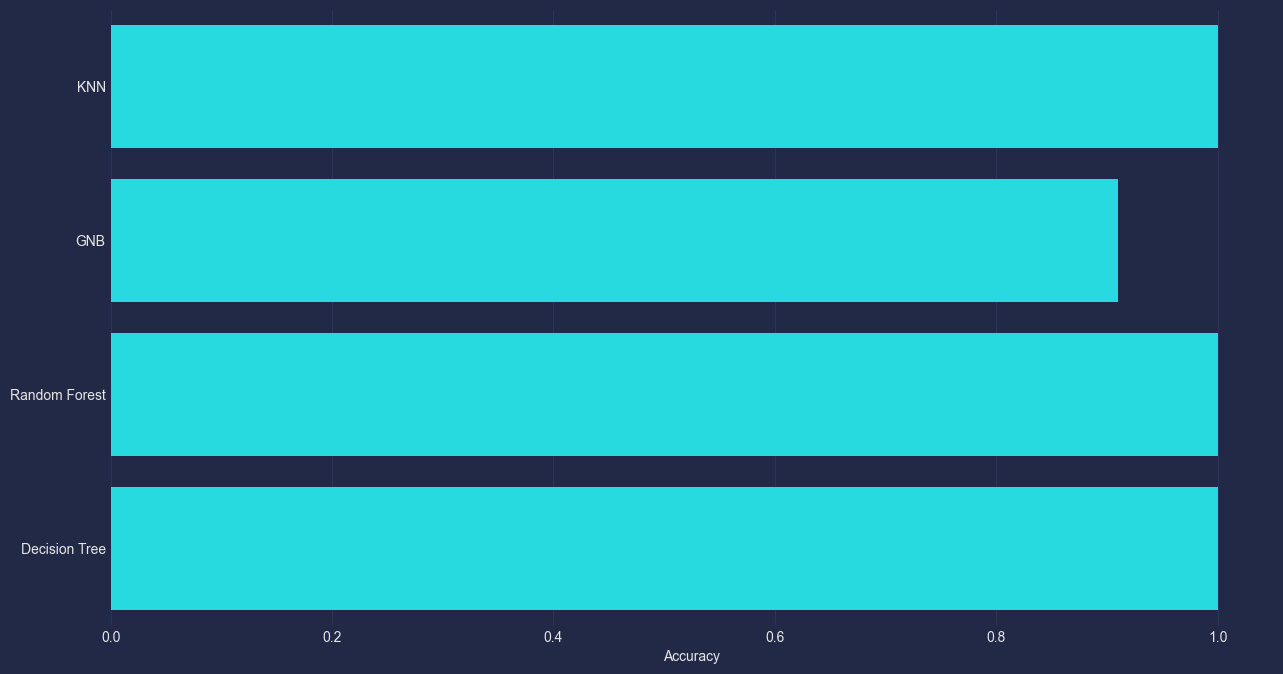

In [81]:
plt.figure(figsize=(15, 8))
sns.barplot(
    x=list(ml_accuracies.values()),
    y=list(ml_accuracies.keys()),
)
plt.xlabel('Accuracy')
plt.show()